# QF 627 Programming and Computational Finance
## `Py`Day Week `7`

### Machine Learning: `Supervised Learning` for Asset Pricing

#### Dependencies

In [1]:
# !pip install yellowbrick # For expanding your horizons of ML practice (visual diagnostics of models)

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

sns.set_style("whitegrid")

import matplotlib.pyplot as plt

from scipy.stats import spearmanr

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.preprocessing import StandardScaler, scale

from sklearn.feature_selection import mutual_info_regression

from sklearn.pipeline import Pipeline

from sklearn.metrics import make_scorer

from yellowbrick.model_selection import ValidationCurve, LearningCurve

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
%whos

Variable                 Type        Data/Info
----------------------------------------------
KNeighborsClassifier     ABCMeta     <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
KNeighborsRegressor      ABCMeta     <class 'sklearn.neighbors<...>ion.KNeighborsRegressor'>
LearningCurve            type        <class 'yellowbrick.model<...>ing_curve.LearningCurve'>
Pipeline                 ABCMeta     <class 'sklearn.pipeline.Pipeline'>
StandardScaler           type        <class 'sklearn.preproces<...>ng._data.StandardScaler'>
ValidationCurve          type        <class 'yellowbrick.model<...>n_curve.ValidationCurve'>
make_scorer              function    <function make_scorer at 0x15c0f8ee0>
mutual_info_regression   function    <function mutual_info_regression at 0x15cb06a60>
np                       module      <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd                       module      <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt                  

### IMPORT

In [4]:
asset =\
(
    pd
    .read_csv("https://talktoroh.squarespace.com/s/data_for_ml_practice.csv")
)

In [5]:
asset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Wrangle

<Axes: xlabel='price', ylabel='Density'>

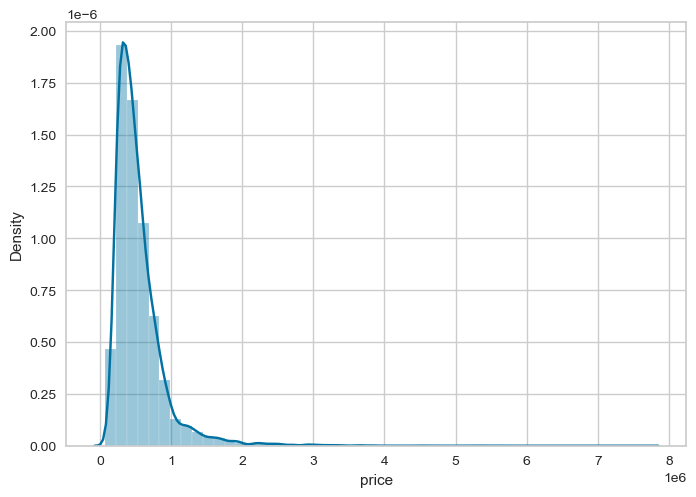

In [6]:
# y

sns.distplot(asset.price)

In [7]:
y =\
(    np
    .log(asset
         .price)
)

In [8]:
asset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
asset.shape[1]

21

In [10]:
asset =\
    asset \
    .drop(["id", "date", "zipcode", "lat", "long"],
          axis = 1
         )

asset.shape[1]

16

In [11]:
Xs =\
    asset \
    .drop("price",
          axis = 1)

### Feature Selection (using Mutual Information Regression)

In [12]:
%whos

Variable                 Type         Data/Info
-----------------------------------------------
KNeighborsClassifier     ABCMeta      <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
KNeighborsRegressor      ABCMeta      <class 'sklearn.neighbors<...>ion.KNeighborsRegressor'>
LearningCurve            type         <class 'yellowbrick.model<...>ing_curve.LearningCurve'>
Pipeline                 ABCMeta      <class 'sklearn.pipeline.Pipeline'>
StandardScaler           type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
ValidationCurve          type         <class 'yellowbrick.model<...>n_curve.ValidationCurve'>
Xs                       DataFrame           bedrooms  bathroom<...>[21613 rows x 15 columns]
asset                    DataFrame              price  bedrooms<...>[21613 rows x 16 columns]
make_scorer              function     <function make_scorer at 0x15c0f8ee0>
mutual_info_regression   function     <function mutual_info_regression at 0x15cb06a60>
np       

In [13]:
MI =\
    (
        pd
        .Series(mutual_info_regression(Xs, y),
                index = Xs.columns)
        .sort_values(ascending = False)
    )

MI

sqft_living      0.349174
grade            0.342761
sqft_living15    0.272447
sqft_above       0.260048
bathrooms        0.204382
bedrooms         0.085324
sqft_lot15       0.083774
yr_built         0.076994
floors           0.073537
sqft_basement    0.066011
sqft_lot         0.061189
view             0.054884
waterfront       0.014279
condition        0.012199
yr_renovated     0.009603
dtype: float64

In [14]:
X =\
    Xs \
    .loc[ : , MI.iloc[ :10].index]

### Scatter Plots (Bivariate Analysis)

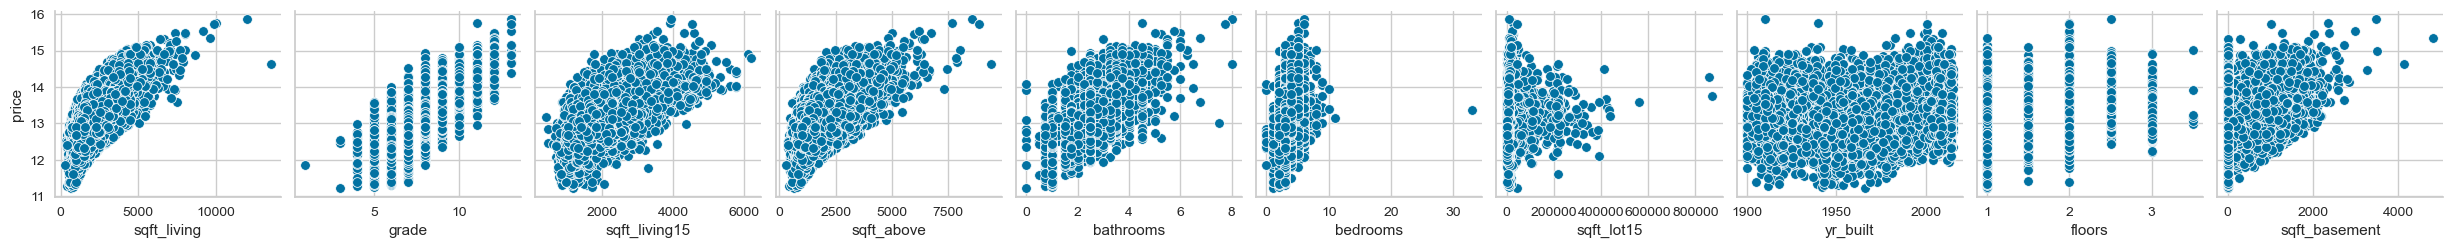

In [15]:
sns \
    .pairplot(X.assign(price = y),
              y_vars = ["price"],
              x_vars = X.columns)

### Examining Correlations (for Supervised Learning)

<Axes: >

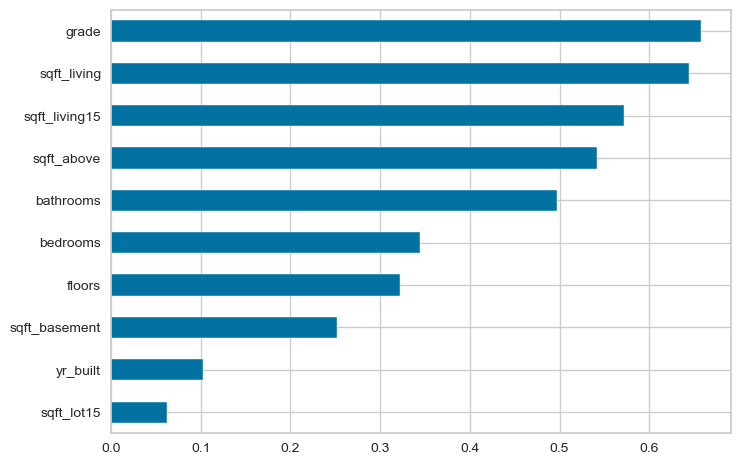

In [16]:
corr =\
    X \
    .apply(lambda x: spearmanr(x, y)[0]
          )

corr \
    .sort_values() \
    .plot \
    .barh()

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    21613 non-null  int64  
 1   grade          21613 non-null  int64  
 2   sqft_living15  21613 non-null  int64  
 3   sqft_above     21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   bedrooms       21613 non-null  int64  
 6   sqft_lot15     21613 non-null  int64  
 7   yr_built       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   sqft_basement  21613 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.6 MB


### Model

In [18]:
scaled_X = scale(X)

In [19]:
algo = KNeighborsRegressor()

In [20]:
algo \
    .fit(X = scaled_X,
         y = y)

KNeighborsRegressor()

In [21]:
y_PRED =\
    algo \
    .predict(scaled_X)

### Calcuate the Errors (y - y_hat)

In [22]:
error =\
    (y - y_PRED) \
    .rename("Prediction Errors")

error

0       -0.318307
1        0.011363
2       -0.392852
3        0.484024
4        0.428821
           ...   
21608   -0.163507
21609    0.016639
21610    0.102537
21611    0.023962
21612   -0.110341
Name: Prediction Errors, Length: 21613, dtype: float64

### Write your codes like Pythonista

In [23]:
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             mean_squared_log_error,
                             median_absolute_error,
                             explained_variance_score,
                             r2_score)

In [24]:
metrics =\
    dict(rmse = np.sqrt(mean_squared_error(y_true = y, y_pred = y_PRED)
                       ),
         rmsle = np.sqrt(mean_squared_log_error(y_true = y, y_pred = y_PRED)
                        ),
         mae = mean_absolute_error(y, y_PRED),
         medianae = median_absolute_error(y, y_PRED),
         r2score = explained_variance_score(y, y_PRED)
        )

<Axes: >

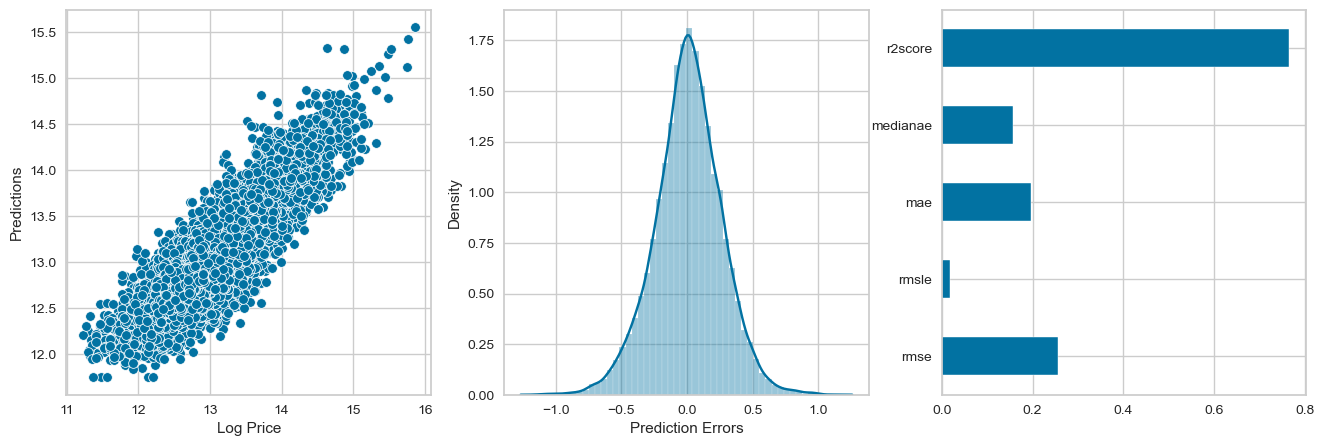

In [25]:
fig, axes = plt.subplots(ncols = 3,
                         figsize = [16, 5]
                        )

sns.scatterplot(x = y,
                y = y_PRED,
                ax = axes[0]
               )

axes[0].set_ylabel("Predictions")
axes[0].set_xlabel("Log Price")

sns.distplot(error,
             ax = axes[1]
            )

pd \
    .Series(metrics) \
    .plot \
    .barh(ax = axes[2]
         )

### Cross-validation

In [26]:
def rmse(y_true, pred):
    return np.sqrt(mean_squared_error(y_true, pred)
                  )

score_RMSE = make_scorer(rmse)

In [27]:
score_RMSE

make_scorer(rmse)

In [28]:
%whos

Variable                   Type                   Data/Info
-----------------------------------------------------------
KNeighborsClassifier       ABCMeta                <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
KNeighborsRegressor        ABCMeta                <class 'sklearn.neighbors<...>ion.KNeighborsRegressor'>
LearningCurve              type                   <class 'yellowbrick.model<...>ing_curve.LearningCurve'>
MI                         Series                 sqft_living      0.349174<...> 0.009603\ndtype: float64
Pipeline                   ABCMeta                <class 'sklearn.pipeline.Pipeline'>
StandardScaler             type                   <class 'sklearn.preproces<...>ng._data.StandardScaler'>
ValidationCurve            type                   <class 'yellowbrick.model<...>n_curve.ValidationCurve'>
X                          DataFrame                     sqft_living  grade<...>[21613 rows x 10 columns]
Xs                         DataFrame                

In [29]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV

In [30]:
cv_rmse = {}

n_neighbors = [1] + list(range(5, 51, 5)
                        )

for n in n_neighbors:
    pipe = Pipeline([("scaler", StandardScaler()
                     ),
                     ("knn", KNeighborsRegressor(n_neighbors = n)
                     )
                    ]
                   )

    cv_rmse[n] = cross_val_score(pipe,
                                 X = X,
                                 y = y,
                                 scoring = score_RMSE,
                                 cv = 5) # Number of CV --> is also tunable!!!

In [31]:
cv_rmse =\
(
    pd
    .DataFrame
    .from_dict(cv_rmse,
               orient = "index")
)

In [32]:
cv_rmse

,0,1,2,3,4
1,0.398053,0.404539,0.405285,0.409555,0.383324
5,0.323542,0.324229,0.314542,0.325574,0.303762
10,0.315212,0.313502,0.304595,0.317394,0.293909
15,0.312281,0.311199,0.302145,0.315143,0.291034
20,0.312910,0.310055,0.300208,0.313171,0.289010
25,0.313104,0.309609,0.300075,0.313155,0.288344
30,0.313299,0.309724,0.300167,0.312395,0.288426
35,0.313534,0.309366,0.300220,0.312733,0.288728
40,0.313750,0.309656,0.301160,0.313429,0.289265
45,0.314235,0.310135,0.301728,0.313683,0.290043


In [33]:
best_n, best_rmse = cv_rmse.mean(1).idxmin(), cv_rmse.mean(1).min()

In [34]:
cv_rmse =\
    cv_rmse \
    .stack() \
    .reset_index()

cv_rmse.columns = ["n", "fold", "RMSE"]

Text(0.5, 1.0, 'Cross-validation results of KNN\nBest N: 30\nBest RMSE: 0.30')

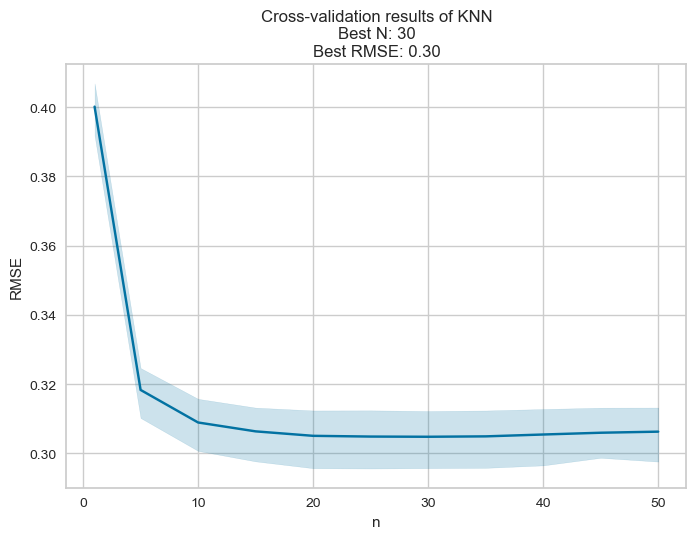

In [35]:
ax =\
    sns \
    .lineplot(x = "n",
              y = "RMSE",
              data = cv_rmse)

ax.set_title(f"Cross-validation results of KNN\nBest N: {best_n:d}\nBest RMSE: {best_rmse:.2f}")

### Actual (Truth) vs. Predicted (Estimated)

In [36]:
pipe = Pipeline([("scaler", StandardScaler()
                 ),
                 ("knn", KNeighborsRegressor(n_neighbors = best_n
                 )
                 )
                ]
               )

y_pred = cross_val_predict(pipe,
                           X,
                           y, 
                           cv = 5)

<Axes: xlabel='price'>

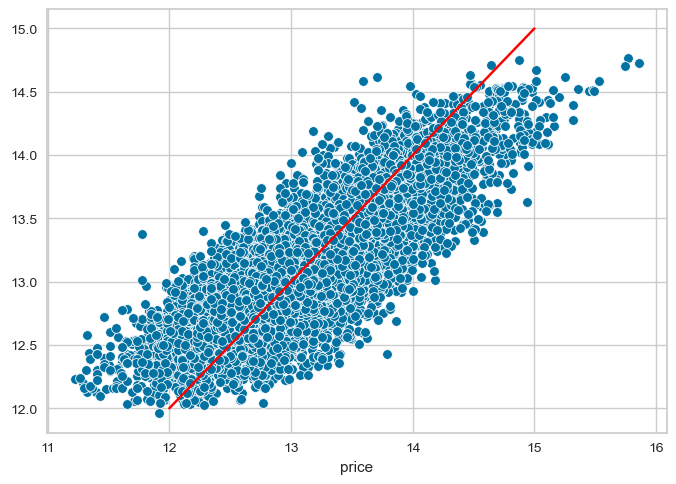

In [37]:
ax =\
    sns.scatterplot(x = y,
                    y = y_pred)

y_range =\
    list(range(int(y.min() + 1), int(y.max() + 1)
              )
        )

pd \
    .Series(y_range,
            index = y_range) \
    .plot(ax = ax,
          c = "red")

### GridSearchCV with `pipeline`

In [38]:
pipe = Pipeline([("scaler", StandardScaler()
                 ),
                 ("knn", KNeighborsRegressor()
                 )
                ]
               )

n_folds = 5
n_neighbors = tuple(range(5, 101, 5)
                   )

In [39]:
parameters_grid = {"knn__n_neighbors": n_neighbors}

estimator =\
    GridSearchCV(estimator = pipe, 
                 param_grid = parameters_grid,
                 cv = n_folds, 
                 scoring = score_RMSE)

In [40]:
estimator \
    .fit(X = X,
         y = y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': (5, 10, 15, 20, 25, 30, 35, 40, 45,
                                              50, 55, 60, 65, 70, 75, 80, 85,
                                              90, 95, 100)},
             scoring=make_scorer(rmse))

In [41]:
dir(estimator)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'feature_names_in_',
 'fit',
 'get_params',
 'inverse_transform',
 

In [42]:
cv_results =\
    estimator \
    .cv_results_

In [43]:
test_scores =\
    (
        pd
        .DataFrame({fold: cv_results[f"split{fold}_test_score"] for fold in range(n_folds)
                   },
                   index = n_neighbors)
        .stack()
        .reset_index()
    )

In [44]:
test_scores.columns = ["k", "fold", "RMSE"]

In [45]:
mean_rmse =\
    test_scores \
    .groupby("k") \
    ["RMSE"] \
    .mean()

In [46]:
mean_rmse

k
5      0.318330
10     0.308922
15     0.306361
20     0.305071
25     0.304857
30     0.304802
35     0.304916
40     0.305452
45     0.305965
50     0.306277
55     0.306576
60     0.307014
65     0.307558
70     0.308119
75     0.308593
80     0.309145
85     0.309671
90     0.310078
95     0.310523
100    0.310901
Name: RMSE, dtype: float64

In [47]:
best_k, best_scores = mean_rmse.idxmin(), mean_rmse.min()

### Visualize Results of Cross-Validation

Text(0.5, 1.0, 'Results of Cross-Validation')

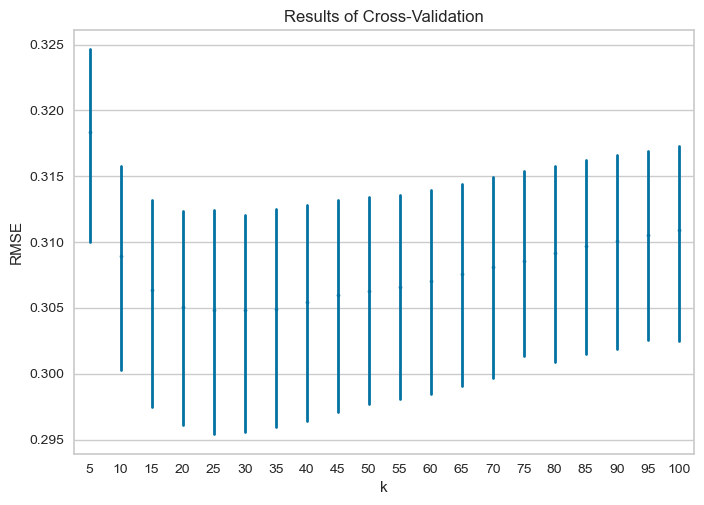

In [48]:
sns \
    .pointplot(x = "k",
               y = "RMSE",
               data = test_scores,
               scale = .3,
               errwidth = 2,
               join = False
               )

plt.title("Results of Cross-Validation")

### Train & Validation Curves (using yellowbricks)

In [49]:
%whos

Variable                   Type                   Data/Info
-----------------------------------------------------------
GridSearchCV               ABCMeta                <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
KNeighborsClassifier       ABCMeta                <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
KNeighborsRegressor        ABCMeta                <class 'sklearn.neighbors<...>ion.KNeighborsRegressor'>
LearningCurve              type                   <class 'yellowbrick.model<...>ing_curve.LearningCurve'>
MI                         Series                 sqft_living      0.349174<...> 0.009603\ndtype: float64
Pipeline                   ABCMeta                <class 'sklearn.pipeline.Pipeline'>
StandardScaler             type                   <class 'sklearn.preproces<...>ng._data.StandardScaler'>
ValidationCurve            type                   <class 'yellowbrick.model<...>n_curve.ValidationCurve'>
X                          DataFrame                

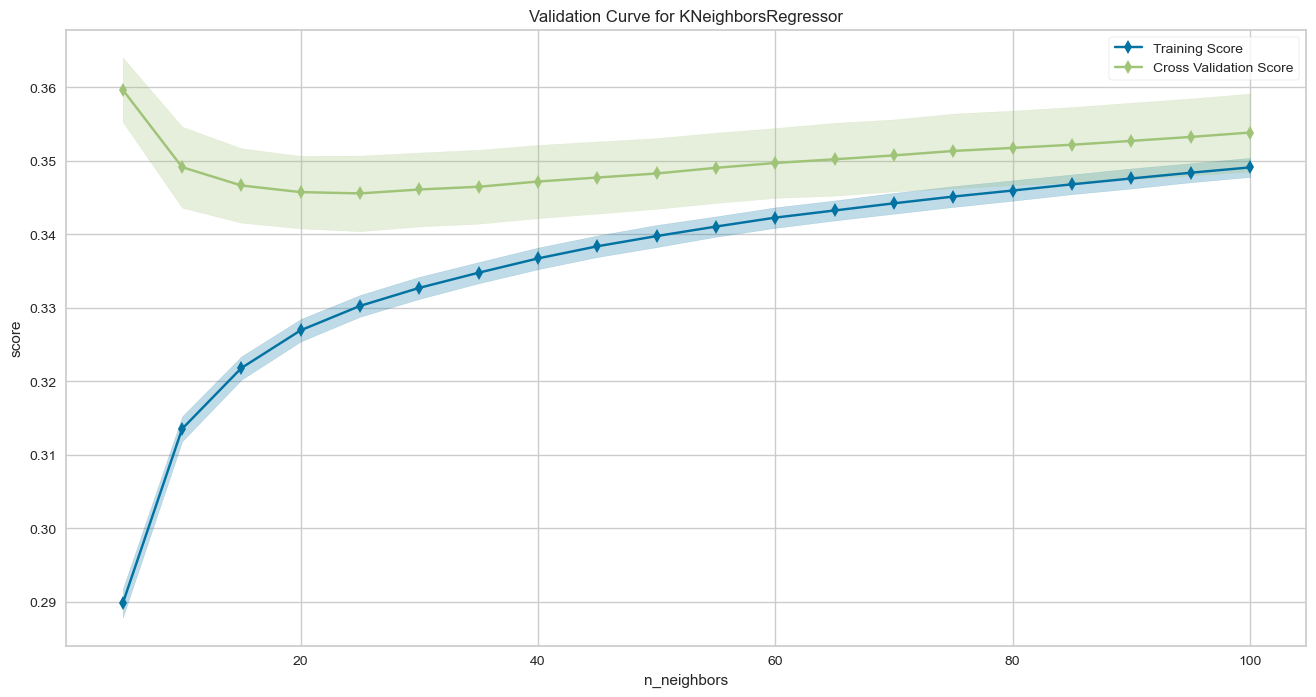

<Axes: title={'center': 'Validation Curve for KNeighborsRegressor'}, xlabel='n_neighbors', ylabel='score'>

In [50]:
fig, ax = plt.subplots(figsize = [16, 8]
                      )

val_curve =\
    ValidationCurve(KNeighborsRegressor(),
                    param_name = "n_neighbors",
                    param_range = n_neighbors,
                    cv = 5,
                    ax = ax,
                    scoring = score_RMSE)

val_curve.fit(X, y)

val_curve.poof()

### Learning Curve

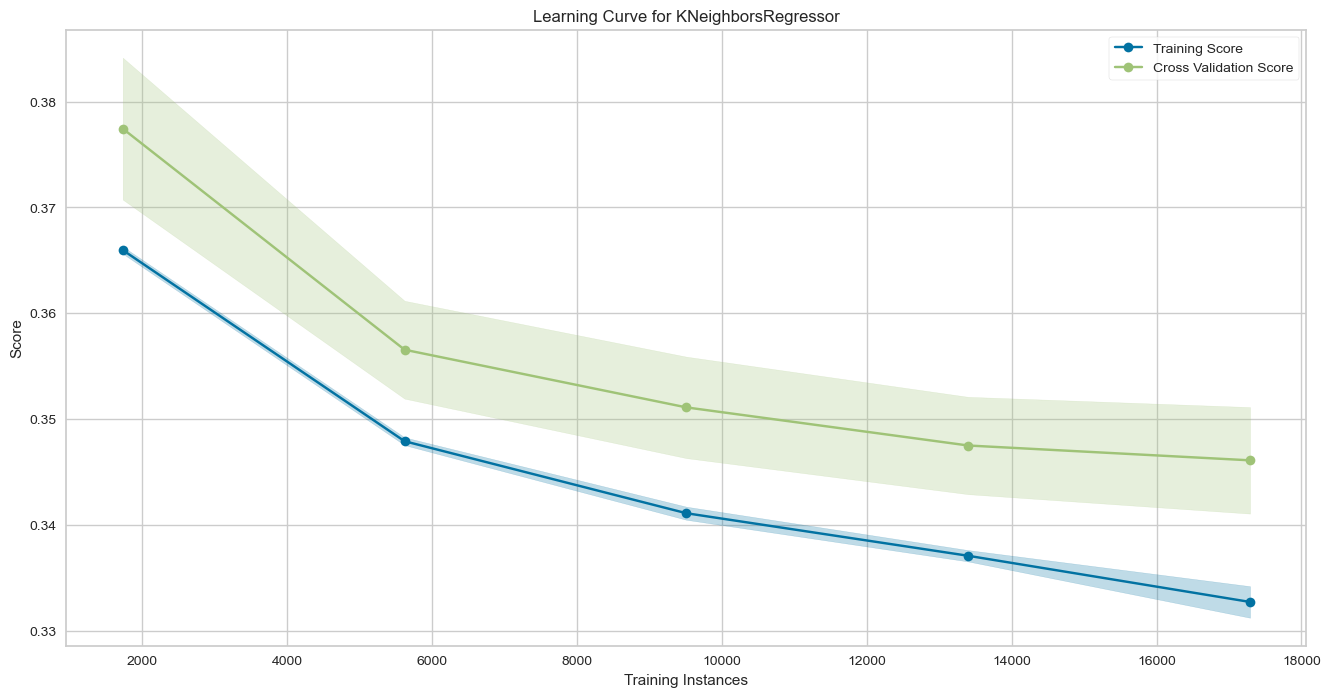

<Axes: title={'center': 'Learning Curve for KNeighborsRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [51]:
fig, ax = plt.subplots(figsize = [16, 8]
                      )

l_curve =\
    LearningCurve(KNeighborsRegressor(n_neighbors = best_k),
                  training_sizes = np.arange(.1, 1.01, .1),
                  scoring = score_RMSE,
                  ax = ax,
                  cv = 5
                 )

l_curve.fit(X, y)
l_curve.poof()

> Team, it was great seeing you at ***Py***Day &#128578;